# Stars of a Feather...

Here we are going to look at some stars close to the Sun that have similar kinematics to one another. First, let's download the data.

In [1]:
from astroquery.gaia import Gaia

gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')
job = Gaia.launch_job_async("SELECT TOP 50000 ra, dec, parallax, pmra, pmdec, radial_velocity "
                            "FROM gaiadr3.gaia_source AS g3 "
                            "WHERE parallax > 5 AND parallax_over_error > 10 AND radial_velocity IS NOT NULL")
data = job.get_results()

Retrieving table 'gaiadr3.gaia_source'
INFO: Query finished. [astroquery.utils.tap.core]


Now let's add these to `galpy`and look what their kinemtics look like.

In [2]:
from galpy.potential import MWPotential2014
from galpy.orbit import Orbit
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

# create sky coordinate
c = SkyCoord(ra=data['ra'],
             dec=data['dec'],
             distance=(1000 / data['parallax']) * u.pc,
             pm_ra_cosdec=data['pmra'],
             pm_dec=data['pmdec'],
             radial_velocity=data['radial_velocity'])
# integrate orbit
o = Orbit(c, ro=8, vo=220)

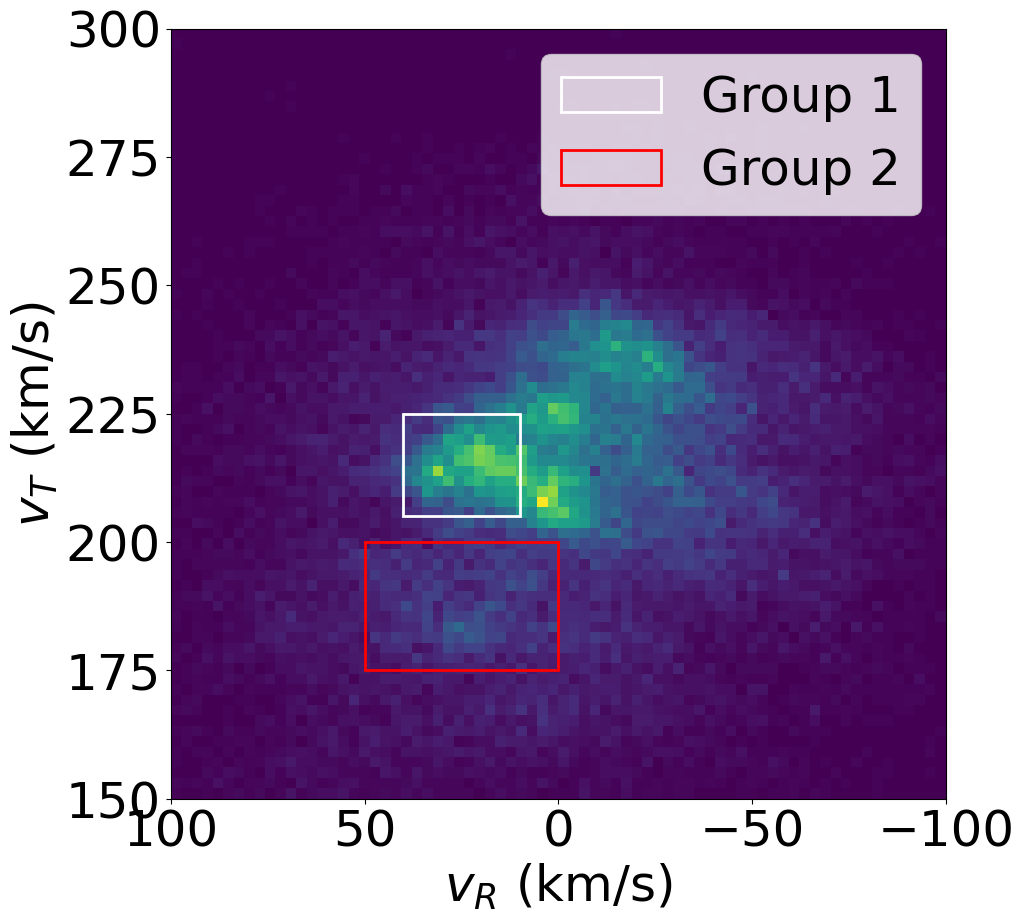

In [3]:
from matplotlib.patches import Rectangle

f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist2d(o.vR(use_physical=True), o.vT(use_physical=True),
           bins=[np.linspace(-100, 100, 75), np.linspace(150, 300, 75)])
rect = Rectangle((10, 205), 30, 20, linewidth=2, edgecolor='w', facecolor='none', label='Group 1')
ax.add_patch(rect)
rect = Rectangle((0, 175), 50, 25, linewidth=2, edgecolor='r', facecolor='none', label='Group 2')
ax.add_patch(rect)
plt.legend()
ax.set_xlabel(r'$v_R$ (km/s)')
ax.set_ylabel(r'$v_T$ (km/s)')
ax.invert_xaxis()
plt.show()

On the plot I have identified two groups of stars. The significance of these is something we will touch on later, but for now let's investigate them a bit! Select both of these groups from the overall dataset and integrate their orbits forward in time 500 Myr.

In [4]:
# add code here!

# HINT integrate orbits like this
# ts = np.linspace(0, 0.5, 10) * u.Gyr
# o.integrate(ts, MWPotential2014, method='dop853_c')

# selection for groups
vR = o.vR(use_physical=True)
vT = o.vT(use_physical=True)
data_group_1 = data[(vR > 10) & (vR < 40) & (vT > 205) & (vT < 225)]
data_group_2 = data[(vR > 0) & (vR < 50) & (vT > 175) & (vT < 200)]




With the orbits integrated, now look at the spatial distirubtion of these two groups after 500 Myr. What do you notice is in common between these two groupings? What is different about them?

In [6]:
# add code here!

# HINT in galpy, at t = 0 all stars are centered around X = 8 and Y = 0


Now pick two random stars from each groups. Integreate their orbits over 3 Gyr and see how the path of their orbits over time compare. Make sure to use a lot of timesteps so you can see the path of their orbits clearly! Compare the orbits within each group and also compare the orbit from one group to another. Also consider looking at the distribution of Galactic radius over this 3 Gyr period for each orbit. of Discuss the similarities and differences you see.

In [8]:
# add code here

# HINT orbits are indexable, so you only have to integrate one of them
# o_rand1 = o[0]

# HINT integrate orbits like this
# ts = np.linspace(0, 3, 1000) * u.Gyr
# o_rand1.integrate(ts, MWPotential2014, method='dop853_c')


From this exercise you probably have noticed that within each group, the stars seem to follow similar paths around the Galaxy. Also, even though they are close in velocity space, the general orbits of each group look very different from one another. Discuss a bit what you think may be going on here. HINT: What are some very large structure in the Milky Way Disk that could be influencing things?